In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-student-migration-and-higher-education-trends/global_student_migration.csv


In [2]:
import os

# Check all file names inside the folder
base_path = '/kaggle/input/global-student-migration-and-higher-education-trends'

for file in os.listdir(base_path):
    print(file)


global_student_migration.csv


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/global-student-migration-and-higher-education-trends/global_student_migration.csv')

# Preview first few rows
df.head()


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [4]:
# Show basic info
df.info()

# Show missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Show column names
print("\nColumn names:")
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [5]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Strip spaces from string values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Standardize country/university names (if present)
if 'Country' in df.columns:
    df['Country'] = df['Country'].str.title()

if 'University' in df.columns:
    df['University'] = df['University'].str.title()

# Convert 'Year' column to datetime (if it exists)
if 'Year' in df.columns:
    df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

# Handle missing numeric values
if 'Tuition Fee' in df.columns:
    df['Tuition Fee'] = df['Tuition Fee'].fillna(df['Tuition Fee'].mean())

# Final preview
df.head()


/tmp/ipykernel_13/2649863088.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [6]:
df.to_csv('/kaggle/working/cleaned_student_migration.csv', index=False)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
print(df.columns.tolist())


['student_id', 'origin_country', 'destination_country', 'destination_city', 'university_name', 'course_name', 'field_of_study', 'year_of_enrollment', 'scholarship_received', 'enrollment_reason', 'graduation_year', 'placement_status', 'placement_country', 'placement_company', 'starting_salary_usd', 'gpa_or_score', 'visa_status', 'post_graduation_visa', 'language_proficiency_test', 'test_score']


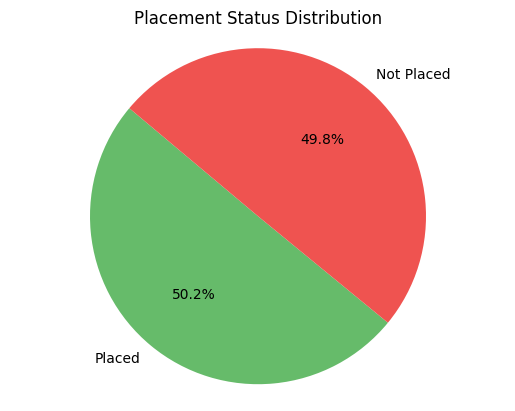

In [9]:
placement_counts = df['placement_status'].value_counts()

plt.pie(placement_counts.values, labels=placement_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66bb6a', '#ef5350'])
plt.title('Placement Status Distribution')
plt.axis('equal')
plt.show()


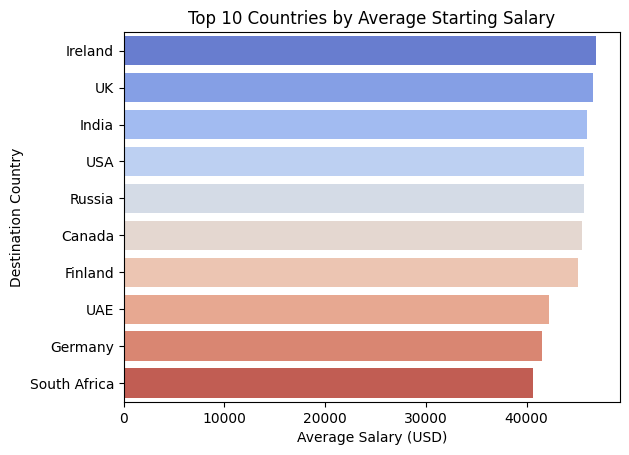

In [10]:
avg_salary = df.groupby('destination_country')['starting_salary_usd'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_salary.values, y=avg_salary.index, palette="coolwarm")
plt.title('Top 10 Countries by Average Starting Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Destination Country')
plt.show()


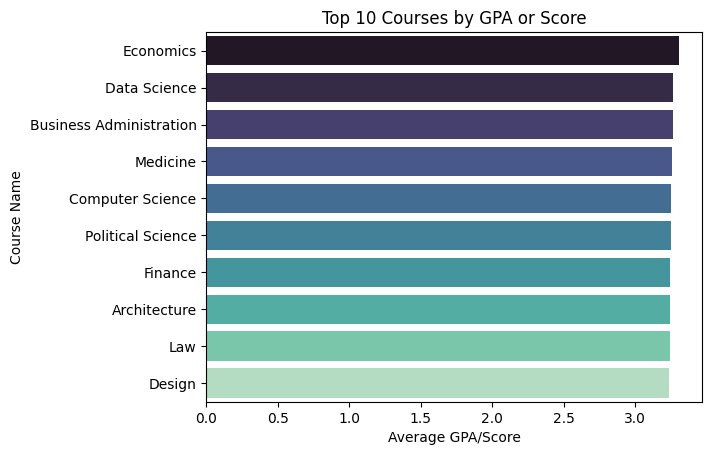

In [11]:
avg_gpa = df.groupby('course_name')['gpa_or_score'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_gpa.values, y=avg_gpa.index, palette="mako")
plt.title('Top 10 Courses by GPA or Score')
plt.xlabel('Average GPA/Score')
plt.ylabel('Course Name')
plt.show()


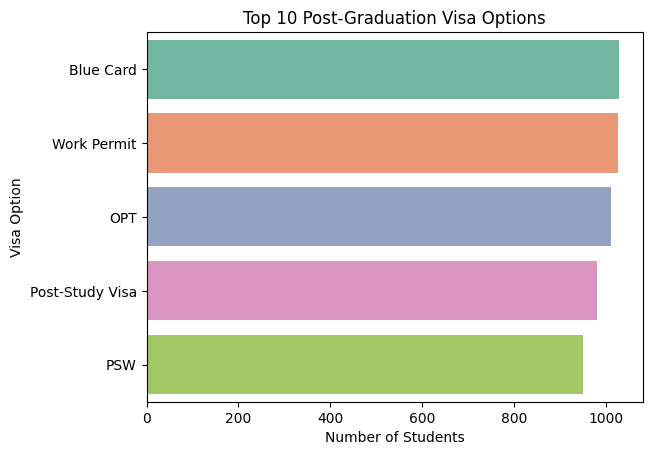

In [12]:
visa_counts = df['post_graduation_visa'].value_counts().head(10)

sns.barplot(x=visa_counts.values, y=visa_counts.index, palette="Set2")
plt.title('Top 10 Post-Graduation Visa Options')
plt.xlabel('Number of Students')
plt.ylabel('Visa Option')
plt.show()


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [14]:
# Drop columns that leak placement outcome or are irrelevant
df_model = df.drop(['student_id', 'placement_country', 'placement_company'], axis=1)

# Encode target column: "Placed" → 1, "Not Placed" → 0
df_model['placement_status'] = df_model['placement_status'].map({'Placed': 1, 'Not Placed': 0})

# Fill missing values
df_model.fillna({
    'starting_salary_usd': 0,
    'gpa_or_score': df_model['gpa_or_score'].mean(),
    'test_score': 0,
}, inplace=True)

# Label encode categorical variables
label_cols = df_model.select_dtypes(include='object').columns

le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])


In [15]:
X = df_model.drop('placement_status', axis=1)
y = df_model['placement_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00       525

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
 [[475   0]
 [  0 525]]


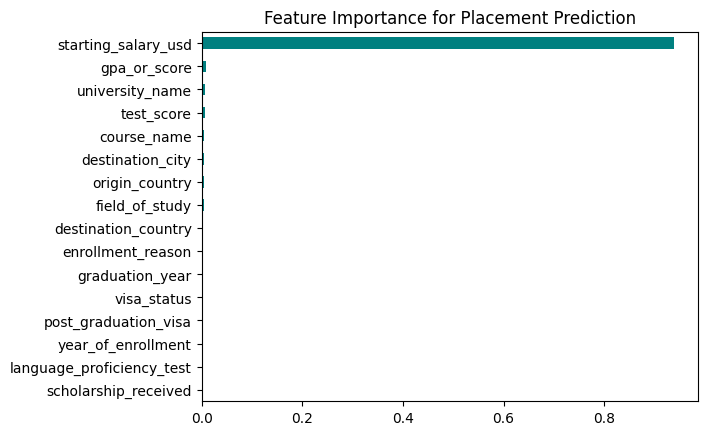

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Feature Importance for Placement Prediction')
plt.show()
